# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
import warnings
warnings.filterwarnings('ignore')

Importing the formatted bank-full.csv file

In [3]:
from google.colab import files
uploaded=files.upload()

Saving bank-full.csv to bank-full (4).csv


In [4]:
data=pd.read_csv('bank-full.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
for i in data.columns:
  print('The value counts of the features',i,':',data[i].value_counts().count())

The value counts of the features age : 77
The value counts of the features job : 12
The value counts of the features marital : 3
The value counts of the features education : 4
The value counts of the features default : 2
The value counts of the features balance : 7168
The value counts of the features housing : 2
The value counts of the features loan : 2
The value counts of the features contact : 3
The value counts of the features day : 31
The value counts of the features month : 12
The value counts of the features duration : 1573
The value counts of the features campaign : 48
The value counts of the features pdays : 559
The value counts of the features previous : 41
The value counts of the features poutcome : 4
The value counts of the features y : 2


Checking for missing values

In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Checking for duplicates

In [7]:
data[data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [11]:
numerical_features=[feature for feature in data.columns if data[feature].dtypes == 'int64']
print('Number of numerical variables:', len(numerical_features))

data[numerical_features]

Number of numerical variables: 7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [12]:
numerical_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [13]:
categorical_features=[features for features in data.columns if features not in numerical_features]
print('Number of categorical variables:', len(categorical_features))

data[categorical_features].head()

Number of categorical variables: 10


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [14]:
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [15]:
#data['job']=data['job'].astype('category')

In [16]:
for feature in categorical_features:
  data[feature]=data[feature].astype('category')

data.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object

Understanding the Dependent variable 'y'

In [17]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

<Axes: xlabel='y', ylabel='count'>

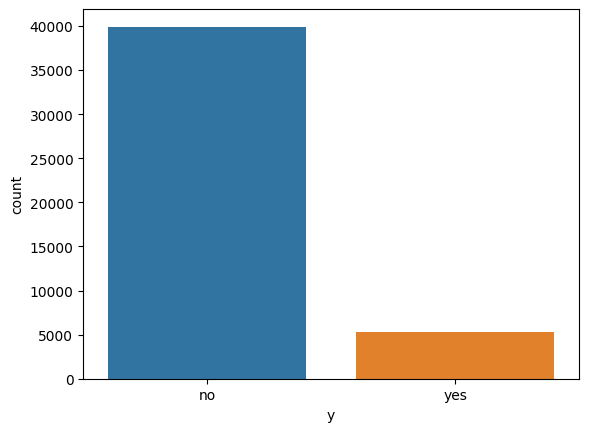

In [18]:
sns.countplot(x='y',data=data)

In [19]:
data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


Understanding the Numerical variables

In [20]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Correlation

In [21]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<Axes: >

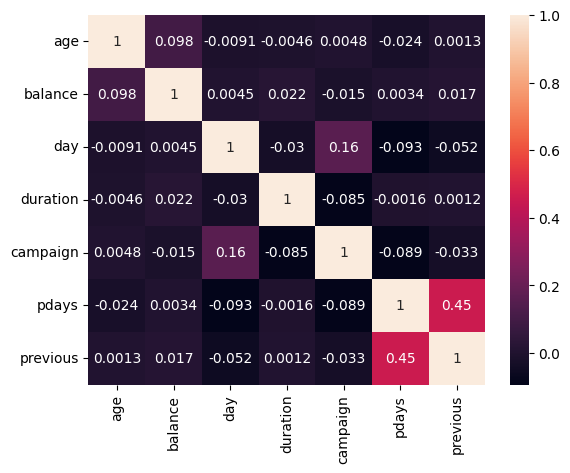

In [22]:
sns.heatmap(data.corr(),annot=True)

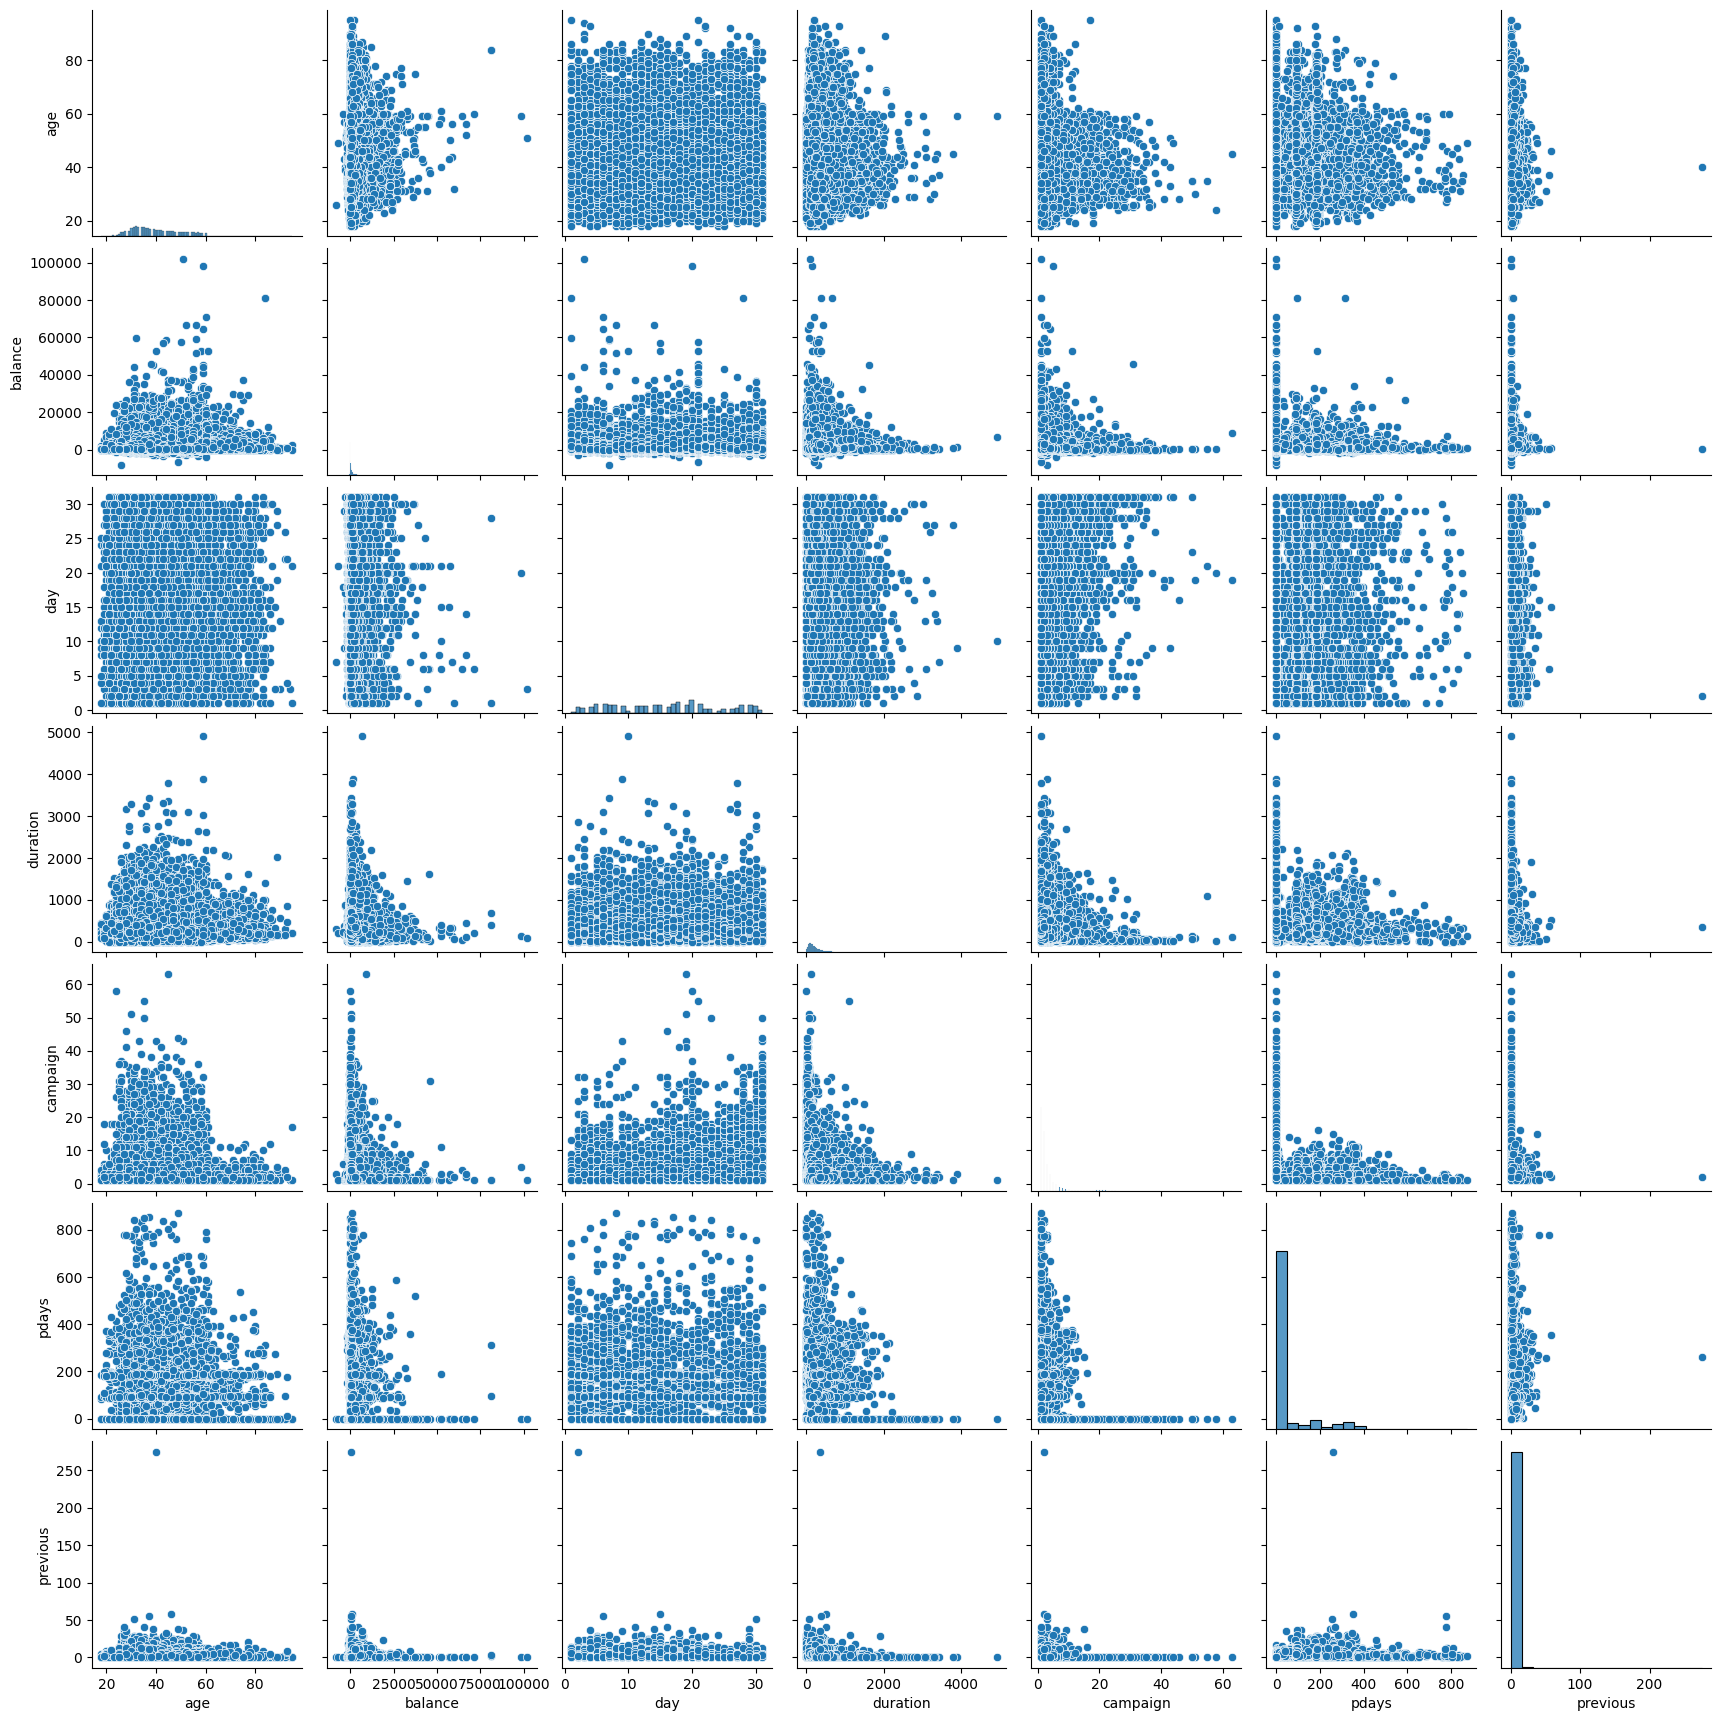

In [46]:
sns.pairplot(data)

In [23]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Data Visualization

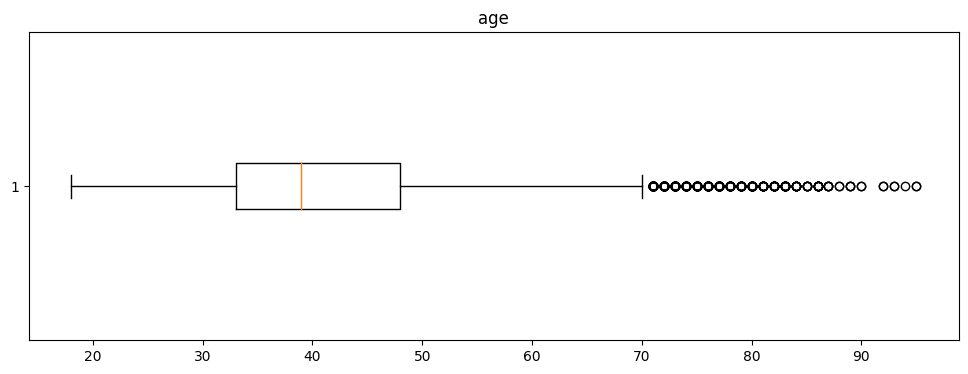

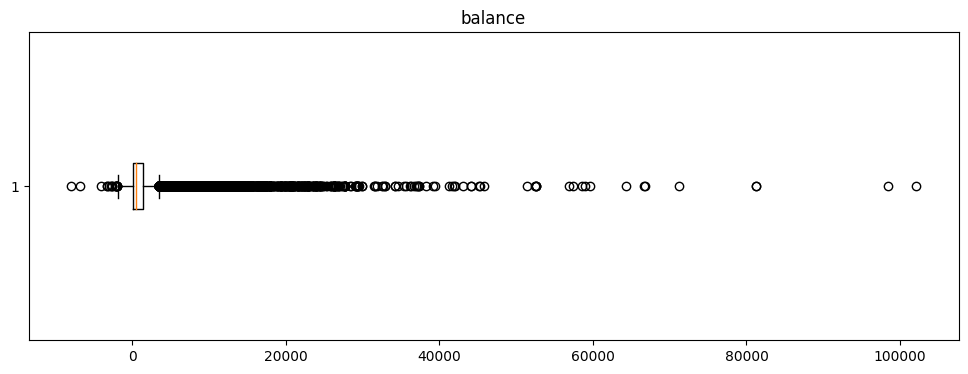

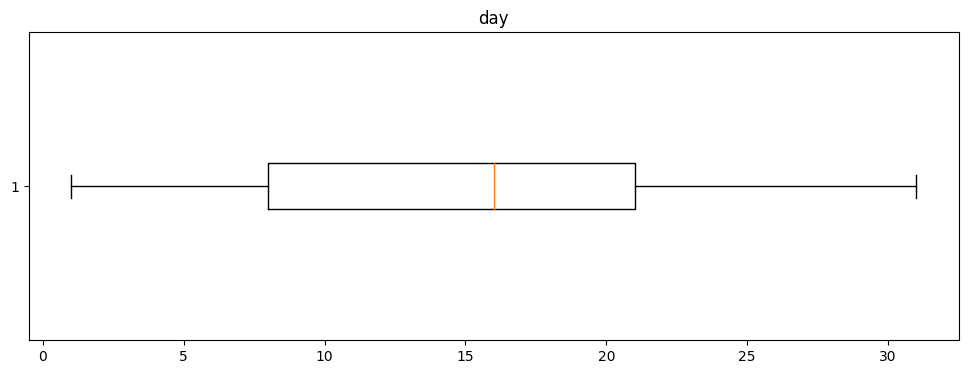

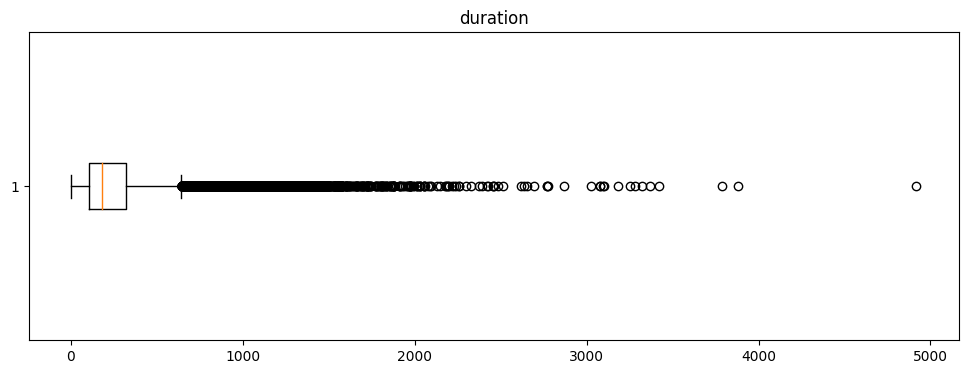

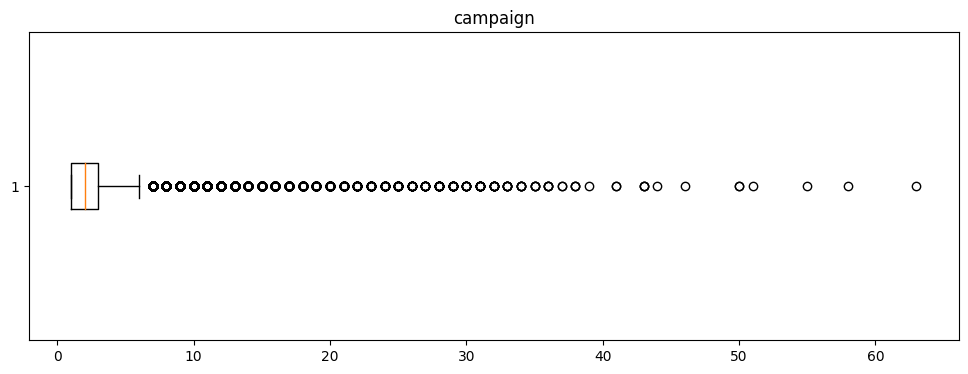

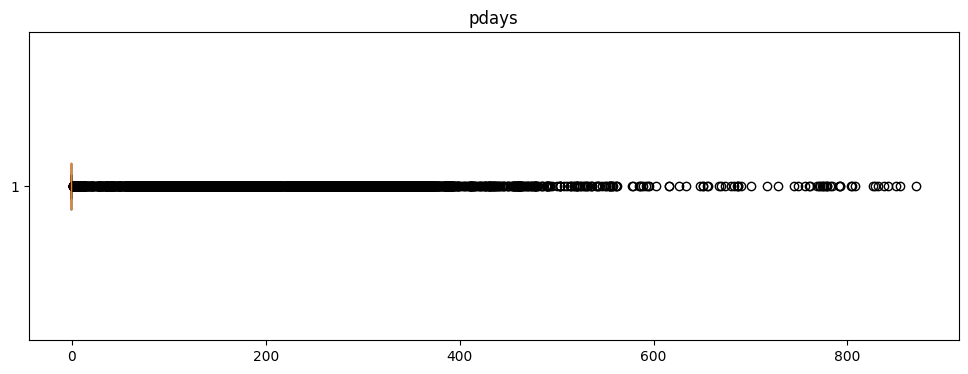

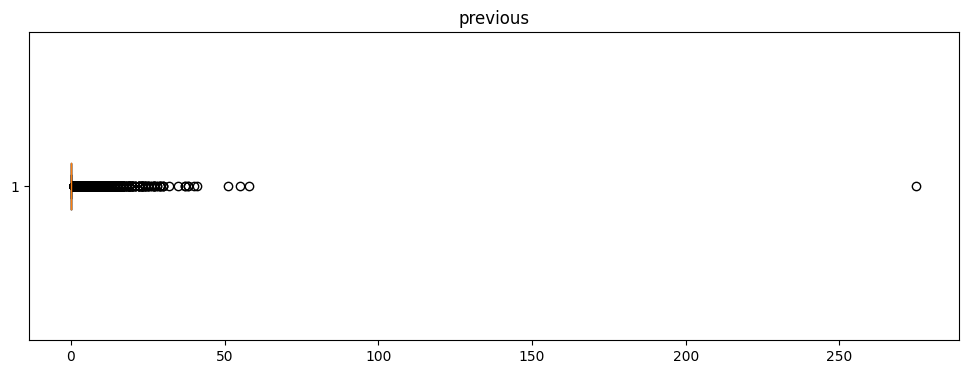

In [24]:
for feature in numerical_features:
  plt.figure(figsize=(12,4))
  plt.boxplot(data[feature],vert=False)
  plt.title(feature)
  plt.show()

Except the day feature all other features have the outliers.

In [25]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Understanding the Categorical variables

In [26]:
data.job.value_counts().count()

12

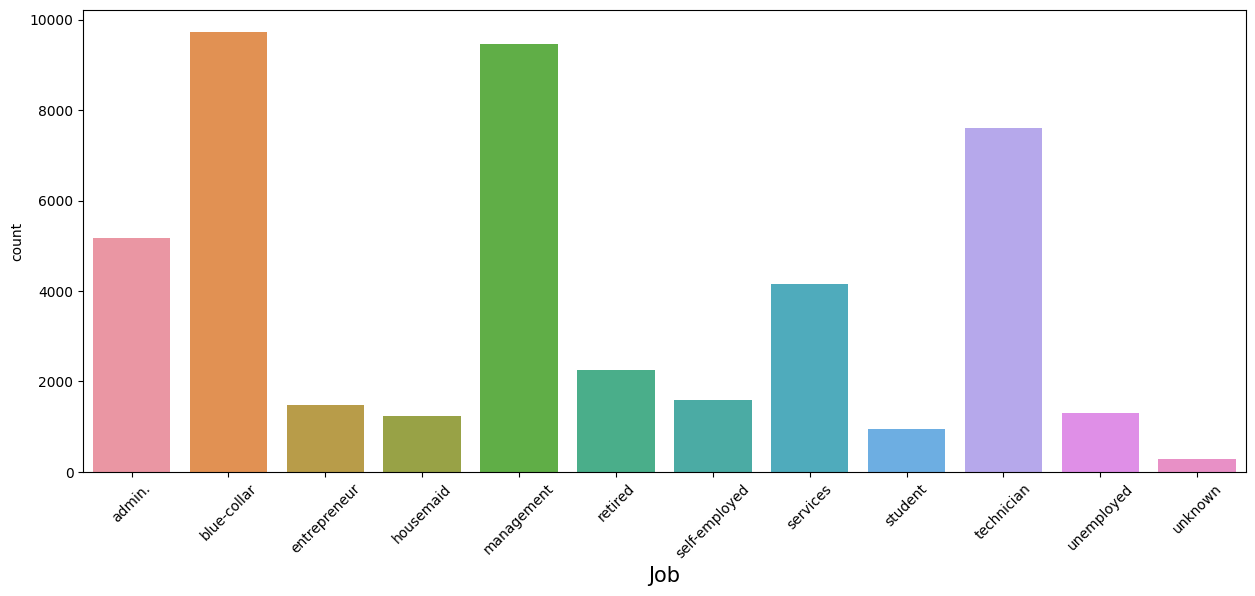

In [27]:
plt.figure(figsize=(15,6))
sns.countplot(x='job',data=data)
plt.xlabel('Job',fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [28]:
data.marital.value_counts().count()

3

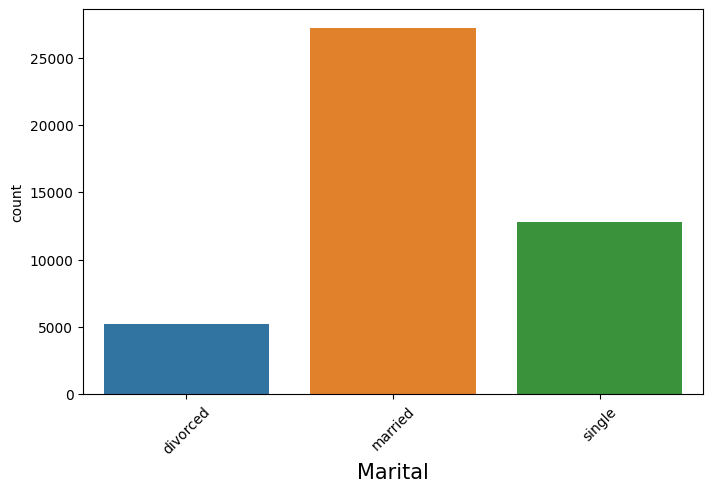

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x='marital',data=data)
plt.xlabel('Marital',fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [30]:
data.education.value_counts().count()

4

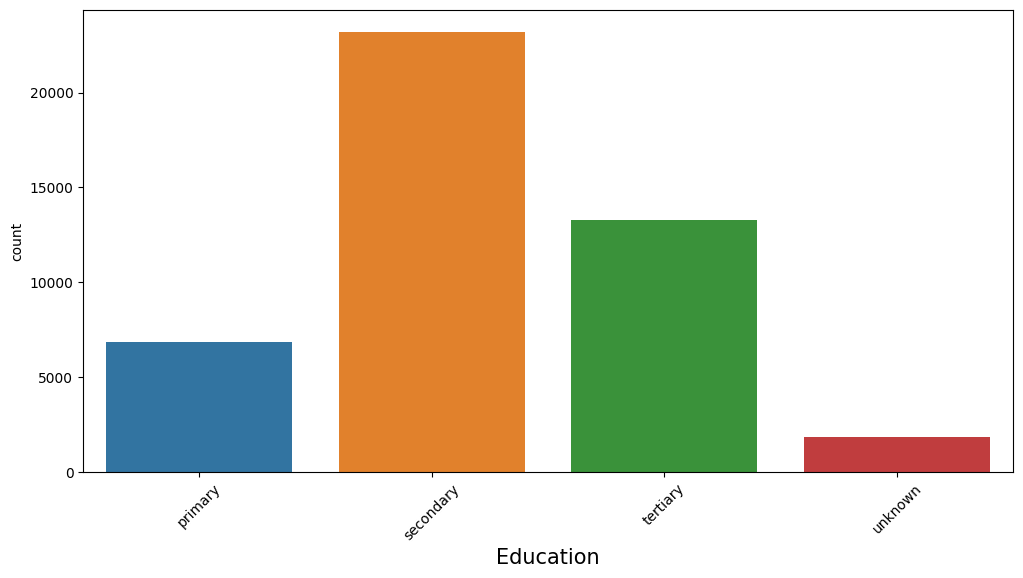

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(x='education',data=data)
plt.xlabel('Education',fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [32]:
data.default.value_counts().count()

2

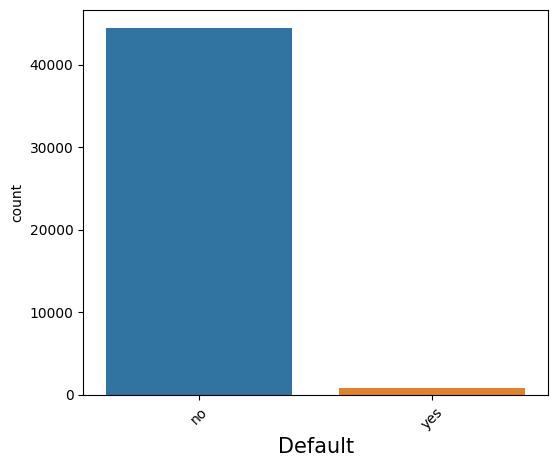

In [33]:
plt.figure(figsize=(6,5))
sns.countplot(x='default',data=data)
plt.xlabel('Default',fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [34]:
data.housing.value_counts().count()

2

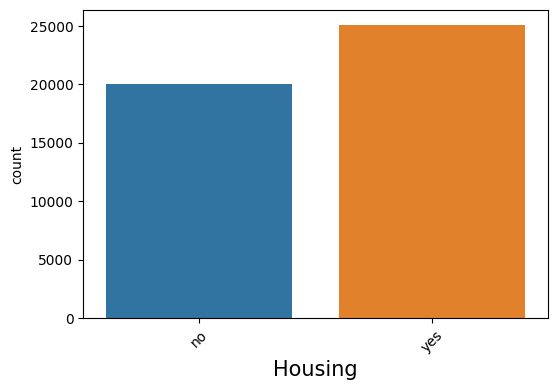

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(x='housing',data=data)
plt.xlabel('Housing',fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [36]:
data.loan.value_counts().count()

2

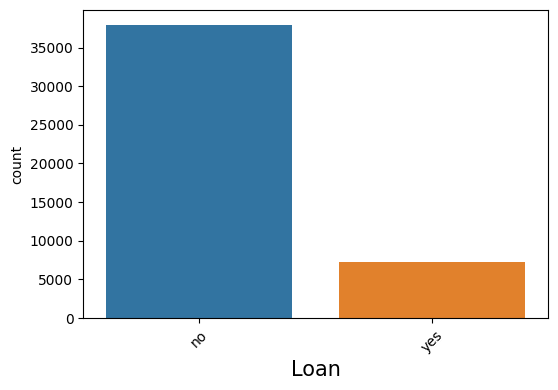

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(x='loan',data=data)
plt.xlabel('Loan',fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [38]:
data.contact.value_counts().count()

3

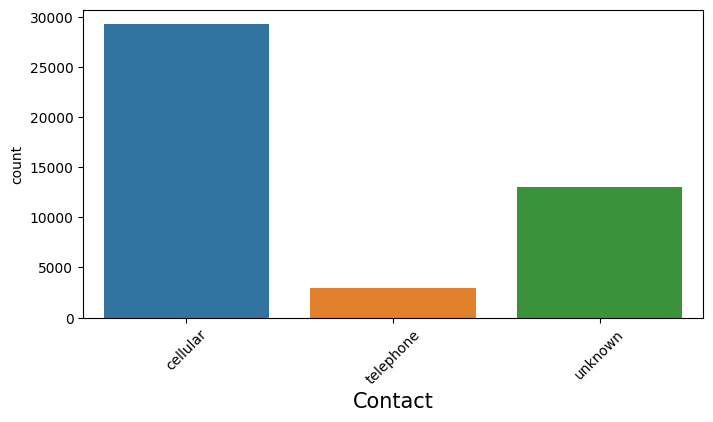

In [39]:
plt.figure(figsize=(8,4))
sns.countplot(x='contact',data=data)
plt.xlabel('Contact',fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [40]:
data.month.value_counts().count()

12

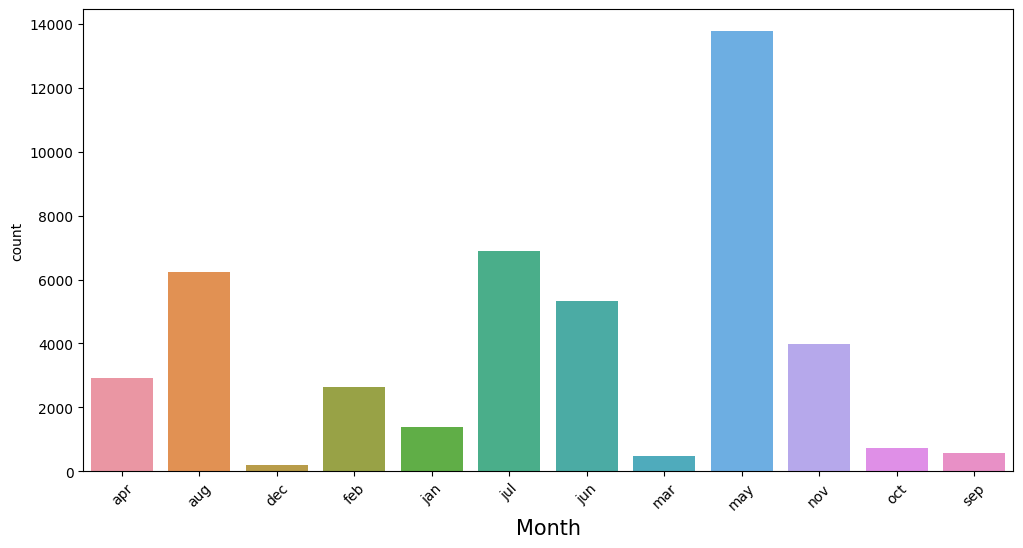

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(x='month',data=data)
plt.xlabel('Month',fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [42]:
data.poutcome.value_counts().count()

4

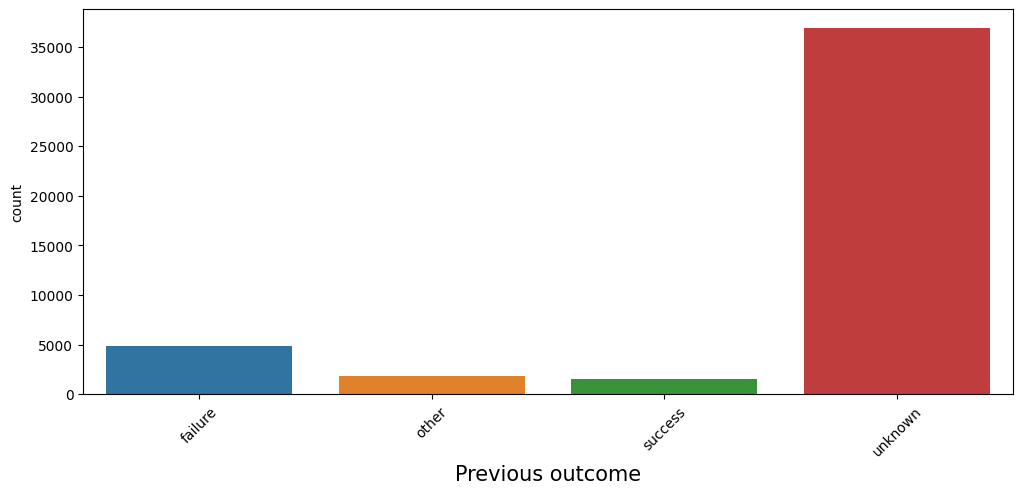

In [43]:
plt.figure(figsize=(12,5))
sns.countplot(x='poutcome',data=data)
plt.xlabel('Previous outcome',fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [48]:
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

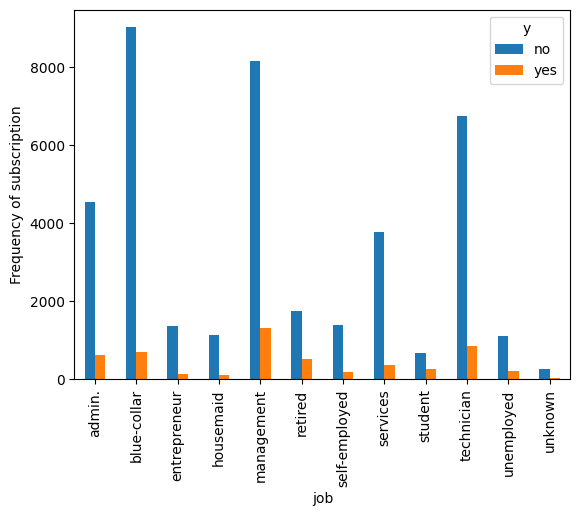

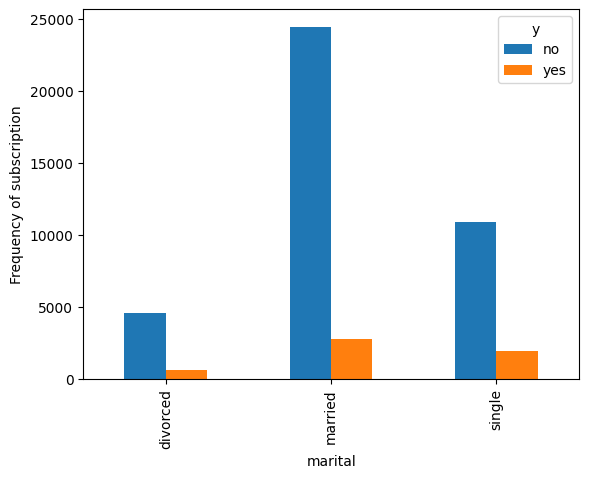

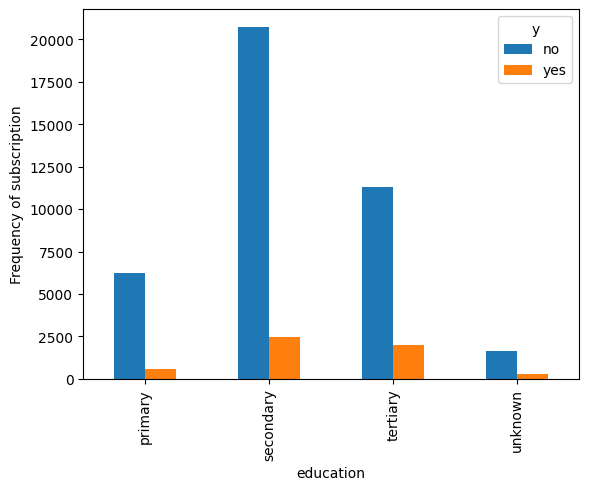

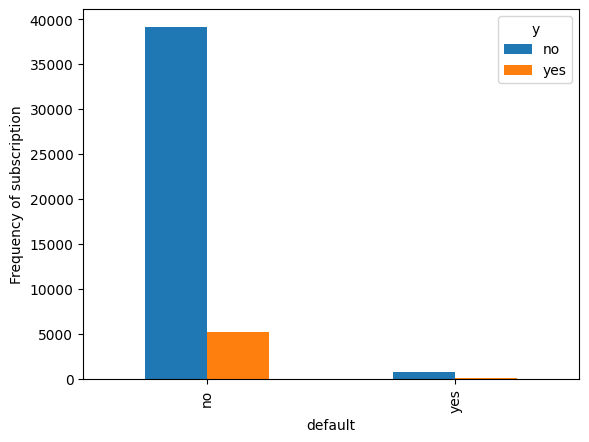

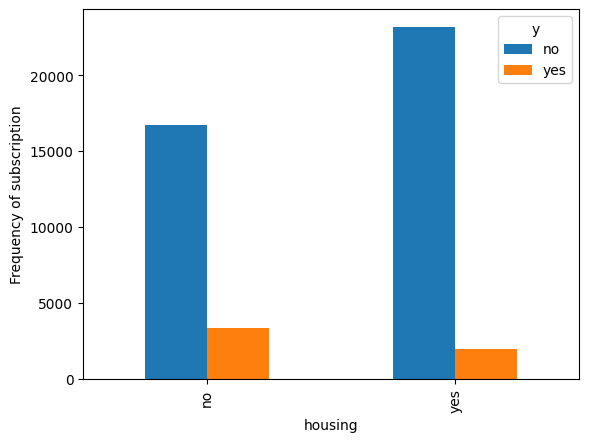

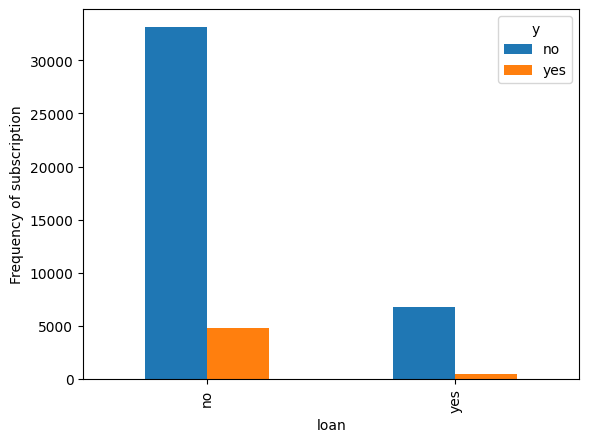

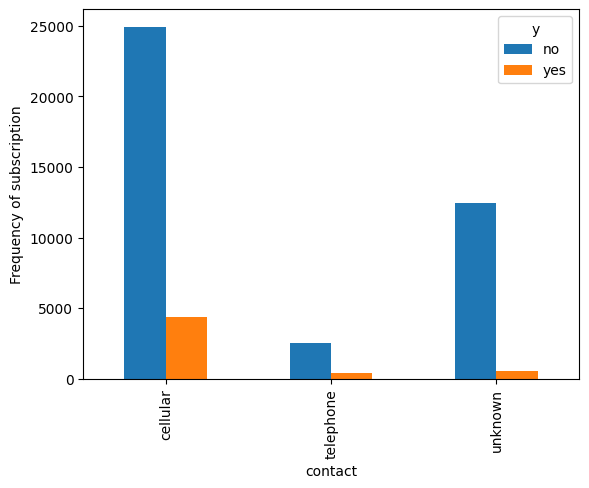

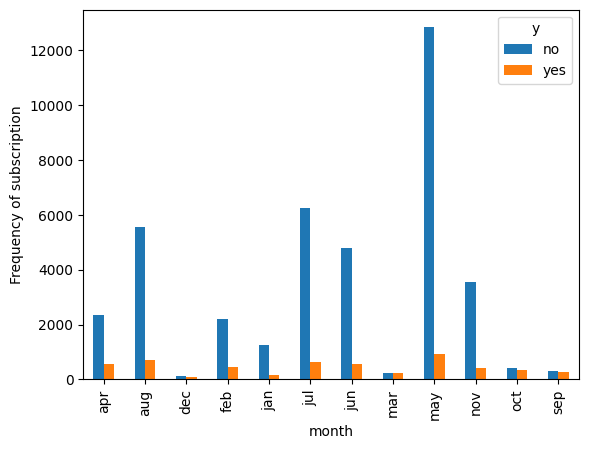

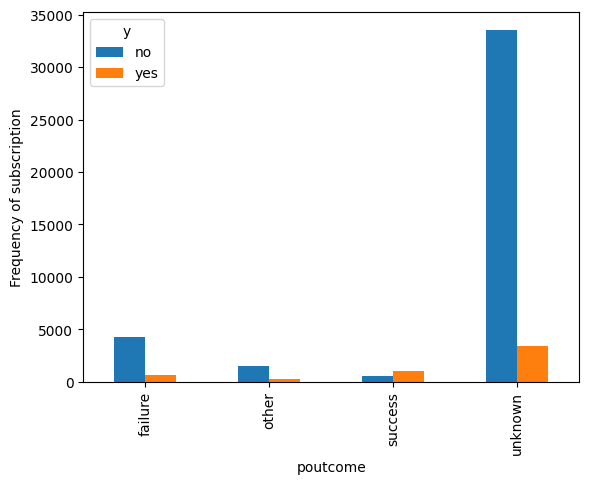

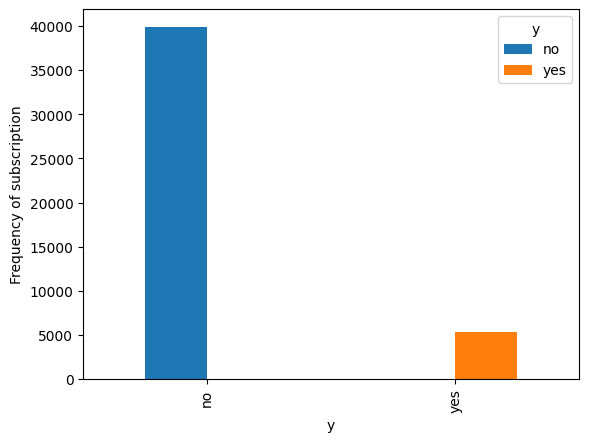

In [50]:
for feature in categorical_features:
  pd.crosstab(data[feature],data.y).plot(kind='bar')
  plt.xlabel(feature)
  plt.ylabel('Frequency of subscription')

In [44]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Dummies to the categorical variables

In [51]:
data['default']=data['default'].map({'yes':1,'no':0})
data['loan']=data['loan'].map({'yes':1,'no':0})
data['housing']=data['housing'].map({'yes':1,'no':0})
data['y']=data['y'].map({'yes':1,'no':0})

In [53]:
data=pd.get_dummies(data,columns=['job','marital','education','poutcome','contact','month'])
data

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


## Dividing the data into dependent and independent variables

In [54]:
X=data.iloc[:,0:-1]
X

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,0,1,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,0,1,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,0,1,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,0,1,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,0,0,0,0,1,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,0,0,0,1,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,0,0,0,1,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,0,0,0,1,0


In [55]:
X.isnull().sum()

age                    0
default                0
balance                0
housing                0
loan                   0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
y                      0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
poutcome_failure       0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0
contact_cellular       0
contact_telephone      0
contact_unknown        0
month_apr              0
month_aug              0
month_dec              0


In [56]:
Y=data.iloc[:,-1]
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: month_sep, Length: 45211, dtype: uint8

## Model Building

Using 80-20 rule to split the training and testing data

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=None)

In [60]:
print('Shape of x_train',x_train.shape)
print('Shape of x_test',x_test.shape)
print('Shape of y_train',y_train.shape)
print('Shape of y_test',y_test.shape)

Shape of x_train (36168, 48)
Shape of x_test (9043, 48)
Shape of y_train (36168,)
Shape of y_test (9043,)


In [59]:
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [70]:
classifier.coef_

array([[-5.61453829e-03, -2.05948027e-02,  1.63767568e-05,
        -5.86555709e-01, -1.56961951e-01, -6.70569812e-02,
        -3.14120253e-04, -1.09484692e+00,  1.84338862e-03,
         8.61230354e-03,  3.33021033e-01, -3.13806424e-02,
        -2.42021297e-01, -1.20021560e-02, -5.05930935e-04,
         2.56494187e-02,  1.71209959e-01, -2.40556095e-02,
        -1.11494548e-01,  3.79201099e-02, -1.16419588e-01,
        -3.41675837e-03,  1.18155798e-02, -2.08619152e-02,
        -7.44651018e-02, -1.99374445e-01, -3.24063844e-02,
        -2.90347881e-01,  2.15931784e-03,  2.58934850e-02,
        -5.77264422e-02,  1.25323497e-02,  1.57848621e-01,
        -4.07355991e-01, -8.10457155e-02,  6.29182358e-02,
        -2.76573983e-01, -9.13174825e-02, -1.43728289e-01,
        -1.05067816e-02, -2.05248461e-01, -1.39765873e-02,
        -1.51628637e-01, -2.23764751e-01, -2.31910619e-02,
        -4.55058463e-01, -7.30799171e-02, -2.78849300e-02]])

In [71]:
Beta_Coefficients=pd.Series(classifier.coef_[0])
Beta_Coefficients

0    -0.005615
1    -0.020595
2     0.000016
3    -0.586556
4    -0.156962
5    -0.067057
6    -0.000314
7    -1.094847
8     0.001843
9     0.008612
10    0.333021
11   -0.031381
12   -0.242021
13   -0.012002
14   -0.000506
15    0.025649
16    0.171210
17   -0.024056
18   -0.111495
19    0.037920
20   -0.116420
21   -0.003417
22    0.011816
23   -0.020862
24   -0.074465
25   -0.199374
26   -0.032406
27   -0.290348
28    0.002159
29    0.025893
30   -0.057726
31    0.012532
32    0.157849
33   -0.407356
34   -0.081046
35    0.062918
36   -0.276574
37   -0.091317
38   -0.143728
39   -0.010507
40   -0.205248
41   -0.013977
42   -0.151629
43   -0.223765
44   -0.023191
45   -0.455058
46   -0.073080
47   -0.027885
dtype: float64

In [76]:
Coef_df= pd.DataFrame({'Variables': X.columns,'Beta Coefficients': Beta_Coefficients})
Coef_df

,Variables,Beta Coefficients
0,age,-0.005615
1,default,-0.020595
2,balance,0.000016
3,housing,-0.586556
4,loan,-0.156962
5,day,-0.067057
6,duration,-0.000314
7,campaign,-1.094847
8,pdays,0.001843
9,previous,0.008612


In [61]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [62]:
y_pred_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
y_pred_df

,Actual,Predicted
9975,0,0
27242,0,0
36979,0,0
31977,0,0
45191,0,0
...,...,...
34796,0,0
24361,0,0
25762,0,0
16780,0,0


In [63]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[8910,    0],
       [ 133,    0]])

In [64]:
pd.crosstab(y_test,y_pred)

col_0,0
month_sep,
0,8910
1,133


In [65]:
Accuracy=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
np.round(Accuracy,2)

0.99

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8910
           1       0.00      0.00      0.00       133

    accuracy                           0.99      9043
   macro avg       0.49      0.50      0.50      9043
weighted avg       0.97      0.99      0.98      9043



ROC curve

In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [68]:
pred_prob=classifier.predict_proba(x_test)
prob=pred_prob[:,1]
prob

array([2.88537726e-03, 3.12711686e-03, 3.59544702e-04, ...,
       1.30518563e-02, 3.34287807e-05, 1.09722508e-02])

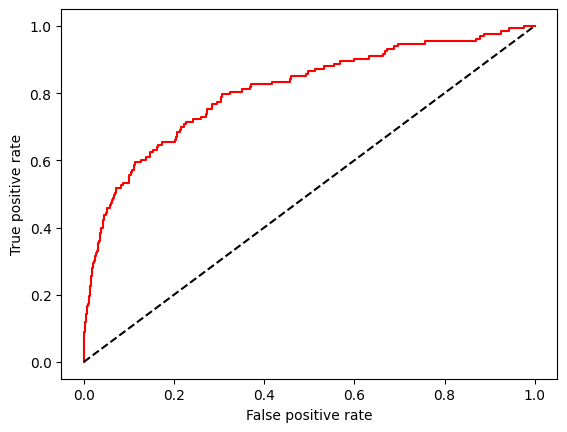

In [69]:
fpr,tpr,thresholds=roc_curve(y_test,prob)
plt.plot(fpr,tpr,color='red',label='logistic regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1],[0,1],'k--')
plt.show()